<a href="https://colab.research.google.com/github/ARSHIA2907/Robotic-WAAM-Input-Characteristics-Prediction-Reverse-Mapping-/blob/main/Reverse_WAAM_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("finalxgb.csv")
Y= dataset.iloc[:,:-2]
X= dataset.iloc[:,-2:]
print(X)
print(Y)

       W     H
0   2.52  2.00
1   3.10  1.77
2   3.74  1.81
3   4.18  1.69
4   3.99  1.67
..   ...   ...
79  7.07  3.04
80  7.14  3.34
81  7.17  3.39
82  7.75  3.02
83  7.85  3.01

[84 rows x 2 columns]
     WD   WFS  WFS/TS
0   0.8  2.36    7.87
1   0.8  2.90    7.26
2   0.8  4.01    8.01
3   0.8  4.80    8.00
4   0.8  5.66    8.08
..  ...   ...     ...
79  1.2  2.66   13.29
80  1.2  3.44   13.74
81  1.2  4.20   13.98
82  1.2  4.81   13.75
83  1.2  5.36   13.39

[84 rows x 3 columns]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.11)
print(xtest)
print(ytest)

       W     H
19  4.99  1.89
25  5.51  2.06
77  6.28  3.53
68  6.25  2.24
3   4.18  1.69
5   4.05  1.61
80  7.14  3.34
33  5.72  2.08
39  3.95  2.73
76  7.71  2.59
     WD    WFS  WFS/TS
19  0.8   6.97   11.61
25  0.8  13.35   13.35
77  1.2   1.68   16.78
68  1.2   4.66    6.66
3   0.8   4.80    8.00
5   0.8   6.22    7.77
80  1.2   3.44   13.74
33  0.8   7.39   14.79
39  1.0   2.13   10.65
76  1.2   4.46   10.24


In [ ]:
xgbr = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X, Y)
print(xgbr)

MultiOutputRegressor(estimator=XGBRegressor(objective='reg:squarederror'))


In [ ]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9078800928886057


In [ ]:
ypredr = xgbr.predict(xtest)
print(ypredr)
print(ytest)

[[ 0.8007444   7.569402   11.393528  ]
 [ 0.82621825 11.889009   12.582073  ]
 [ 1.160959    2.4521737  17.274235  ]
 [ 1.0755789   6.8577585  10.336881  ]
 [ 0.80062467  5.3335915   8.313934  ]
 [ 0.80062467  5.9941006   8.313934  ]
 [ 1.1848931   3.5767682  14.253705  ]
 [ 0.8037974   8.038179   13.488401  ]
 [ 1.0014818   2.3960671  10.930935  ]
 [ 1.179919    4.886816   10.802755  ]]
     WD    WFS  WFS/TS
19  0.8   6.97   11.61
25  0.8  13.35   13.35
77  1.2   1.68   16.78
68  1.2   4.66    6.66
3   0.8   4.80    8.00
5   0.8   6.22    7.77
80  1.2   3.44   13.74
33  0.8   7.39   14.79
39  1.0   2.13   10.65
76  1.2   4.46   10.24


In [ ]:
ypreds = xgbr.predict(xtrain)
print(ypreds)
pd.set_option('display.max_rows', None)
print(ytrain)

[[ 0.799856    3.9267457   8.313934  ]
 [ 0.79297143  2.3960671  15.953302  ]
 [ 1.0241694   6.748177   18.25694   ]
 [ 1.1760366   5.3141685  13.914702  ]
 [ 1.1760422   3.850239   10.463799  ]
 [ 1.031465    3.3792396  16.27274   ]
 [ 1.0035446   7.7676053  14.236241  ]
 [ 0.96728885  5.8281636   9.988577  ]
 [ 0.82440805  4.61106    14.159976  ]
 [ 1.1707008   4.0423303  10.827672  ]
 [ 0.9868394   6.3477635  10.325211  ]
 [ 0.81269217  9.824738   11.347547  ]
 [ 0.7982613   3.9486446  13.711869  ]
 [ 0.98083997  8.570914   10.386796  ]
 [ 1.0293529   4.4598665  16.557703  ]
 [ 0.83034056  9.580611   14.954911  ]
 [ 0.8072566   8.307045   14.618362  ]
 [ 1.0545483   2.4163446  17.341866  ]
 [ 0.80062467  4.519583   11.18909   ]
 [ 0.801967    6.271975   11.393528  ]
 [ 1.1886493   2.1739857  10.78391   ]
 [ 1.1200993   2.3765774  11.425876  ]
 [ 0.9925887   2.2954507  13.85642   ]
 [ 1.1760422   4.0423303  10.827672  ]
 [ 0.8025975  12.020001    8.599069  ]
 [ 1.0886686   4.3643026 

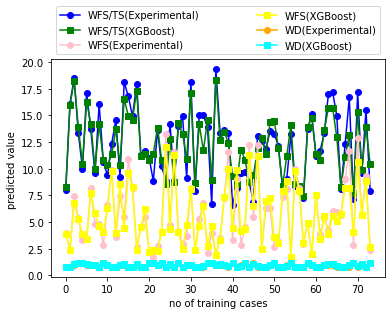

In [ ]:
x_ax = range(len(ytrain))
plt.plot(x_ax, ytrain.iloc[:,-1],label="WFS/TS(Experimental)",color='blue', marker='o')
plt.plot(x_ax, ypreds[:,-1],label="WFS/TS(XGBoost)", color='green', marker='s')
plt.plot(x_ax, ytrain.iloc[:,-2],label="WFS(Experimental)",color='pink', marker='o')
plt.plot(x_ax, ypreds[:,-2],label="WFS(XGBoost)", color='yellow', marker='s')
plt.plot(x_ax, ytrain.iloc[:,-3],label="WD(Experimental)", color='orange', marker='o')
plt.plot(x_ax, ypreds[:,-3],label="WD(XGBoost)", color='cyan', marker='s')
plt.xlabel("no of training cases")
plt.ylabel("predicted value ")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)


plt.show()

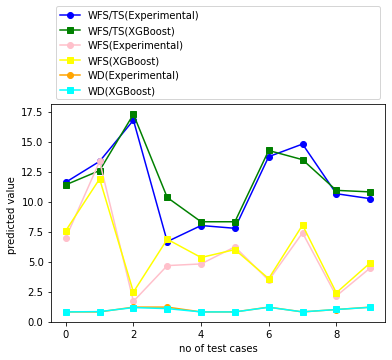

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,-1], label="WFS/TS(Experimental)",color='blue', marker='o')
plt.plot(x_ax, ypredr[:,-1], label="WFS/TS(XGBoost)",color='green', marker='s')
plt.plot(x_ax, ytest.iloc[:,-2], label="WFS(Experimental)",color='pink', marker='o')
plt.plot(x_ax, ypredr[:,-2], label="WFS(XGBoost)",color='yellow', marker='s')
plt.plot(x_ax, ytest.iloc[:,-3], label="WD(Experimental)",color='orange', marker='o')
plt.plot(x_ax, ypredr[:,-3], label="WD(XGBoost)",color='cyan', marker='s')
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)
plt.xlabel("no of test cases")
plt.ylabel("predicted value ")

plt.show()


